<a href="https://colab.research.google.com/github/winsignares/analitica/blob/main/articuloanalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Alistamos nuestra herram

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


###cargamos la base de datos desde google drive


In [39]:
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###accedemos a la ruta del excel

In [40]:
df = pd.read_excel('/content/drive/MyDrive/2023/delincuencia.xls')
df.shape

(31764, 10)

In [50]:
NewMes = []
for item in df.MES:
  if item == 'ene':
    NewMes.append(1)
  elif item == 'feb':
    NewMes.append(2)
  elif item == 'mar':
    NewMes.append(3)
  elif item == 'abr':
    NewMes.append(4)
  elif item == 'may':
    NewMes.append(5)
  elif item == 'jun':
    NewMes.append(6)
  elif item == 'jul':
    NewMes.append(7)
  elif item == 'ago':
    NewMes.append(8)
  elif item == 'sep':
    NewMes.append(9)
  elif item == 'oct':
    NewMes.append(10)
  elif item == 'nov':
    NewMes.append(11)
  elif item == 'dic':
    NewMes.append(12)
  else:
    NewMes.append(0)
 
    

df['NewMes'] = NewMes
df

,MUNICIPIO_HECHO,AÑO,MES,INTERVALOS_HORA,DIA_SEMANA,BARRIOS_HECHO,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,MODALIDAD,Hurto Personas/ HechosDEL 01/01/2018 AL 27/12/2022,NewMes
0,BARRANQUILLA (CT),2021,ene,12:00 - 17:59,Miércoles,1 DE MAYO,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,ATRACO,1,1
1,BARRANQUILLA (CT),2021,ene,06:00 - 11:59,Lunes,7 DE ABRIL,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,ATRACO,1,1
2,BARRANQUILLA (CT),2021,feb,18:00 - 23:59,Sábado,7 DE ABRIL,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,ATRACO,1,2
3,BARRANQUILLA (CT),2021,may,00:00 - 05:59,Miércoles,7 DE ABRIL,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,ATRACO,1,5
4,BARRANQUILLA (CT),2021,may,18:00 - 23:59,Miércoles,7 DE ABRIL,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,ATRACO,1,5
...,...,...,...,...,...,...,...,...,...,...,...
31759,BARRANQUILLA (CT),2019,nov,18:00 - 23:59,Miércoles,VILLA SAN PEDRO III,ARTÍCULO 239. HURTO PERSONAS,SIN EMPLEO DE ARMAS,ATRACO,1,11
31760,BARRANQUILLA (CT),2019,ene,06:00 - 11:59,Miércoles,VILLA SANTOS,ARTÍCULO 239. HURTO PERSONAS,SIN EMPLEO DE ARMAS,ATRACO,1,1
31761,BARRANQUILLA (CT),2019,sep,18:00 - 23:59,Jueves,VILLA SANTOS,ARTÍCULO 239. HURTO PERSONAS,SIN EMPLEO DE ARMAS,ATRACO,1,9
31762,BARRANQUILLA (CT),2019,ene,18:00 - 23:59,Miércoles,VISTA HERMOSA,ARTÍCULO 239. HURTO PERSONAS,SIN EMPLEO DE ARMAS,ATRACO,1,1


###dividimos el dataframe por segmentos

In [68]:
df_2018 = df[df['AÑO']=="2018"]
df_2019 = df[df['AÑO']=="2019"].sort_values('NewMes')
df_2020 = df[df['AÑO']=="2020"].sort_values('NewMes')
df_2021 = df[df['AÑO']=="2021"].sort_values('NewMes')
df_2022 = df[df['AÑO']=="2022"].sort_values('NewMes')
#organizamos por mes enero hasta diciembre
df_2018 = df_2018.sort_values('NewMes')
df_2019 = df_2019.sort_values('NewMes')
df_2020 = df_2020.sort_values('NewMes')
df_2021 = df_2021.sort_values('NewMes')
df_2022 = df_2022.sort_values('NewMes')

### sacamos la suma de los datos según los Meses

In [62]:
SUMADF2018 = df_2018.groupby('MES').sum()
SUMADF2018 = SUMADF2018['Hurto Personas/ HechosDEL 01/01/2018 AL 27/12/2022']
SUMADF2018

MES
abr    528
ago    520
dic    561
ene    393
feb    486
jul    527
jun    516
mar    483
may    583
nov    628
oct    589
sep    492
Name: Hurto Personas/ HechosDEL 01/01/2018 AL 27/12/2022, dtype: int64

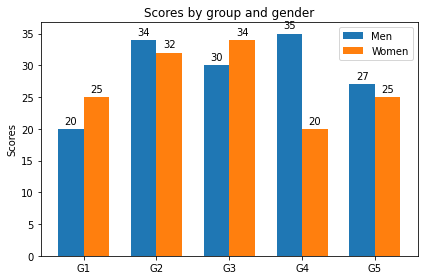

In [52]:

labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May','Jun', 'Jul', 'Ago', 'Sep','Oct','Nov','Dic']
ListDF2018 = list(SUMADF2018)

ListDF2019 = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()